In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import csv
from config import mypass
from database_updater import database_update

white_wine_path = 'resources/wineQualityWhites.csv'
red_wine_path = 'resources/wineQualityReds.csv'

# To update database run
# database_update(red_data=df_red, white_data=df_white, all_data=df_wine)

In [2]:
df_white = pd.read_csv(white_wine_path)
df_white.tail(3)

,ID_white,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4895,4896,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,4897,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,4898,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [3]:
df_red = pd.read_csv(red_wine_path)
df_red.head(3)

,ID_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### Data Exploration

In [4]:
# format ID.red
num_white_wines = df_white['ID_white'][-1:]
df_red['ID_red'] += num_white_wines.values

# Add type columns for red or wite wine red=0, white=1
df_white['type'] = 1
df_red['type'] = 0

#change name of Id columns
df_white = df_white.rename(columns={'ID_white': 'id'})
df_red = df_red.rename(columns={'ID_red': 'id'})

# Create one dataframe for all wine data
df_wine = df_white
df_wine.append(df_red, ignore_index=True)

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,3,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,5,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [5]:
# No null values in either dataset
#df_red.isnull().sum()

df_white.isnull().sum()

id                      0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [6]:
# There are over 3x more datapoints for white wines than red

print('White shape: ', df_white.shape)
print('Red shape: ', df_red.shape)

White shape:  (4898, 14)
Red shape:  (1599, 14)


# # Find outliers

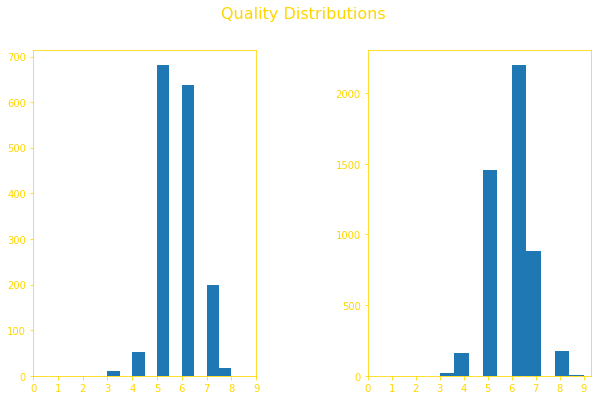

In [7]:
# Wine Quality vs Type

# Make plots


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.suptitle('Quality Distributions', color='gold', size=16)
ax1.hist(df_red['quality'])
ax2.hist(df_white['quality'])


# Set color
axs=[ax1, ax2]

for ax in axs:
    ax.set_xticks(np.arange(0, 10, step=1))
    ax.tick_params(color='gold', labelcolor='gold')
    for spine in ax.spines.values():
        spine.set_edgecolor('gold')


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)
plt.show()

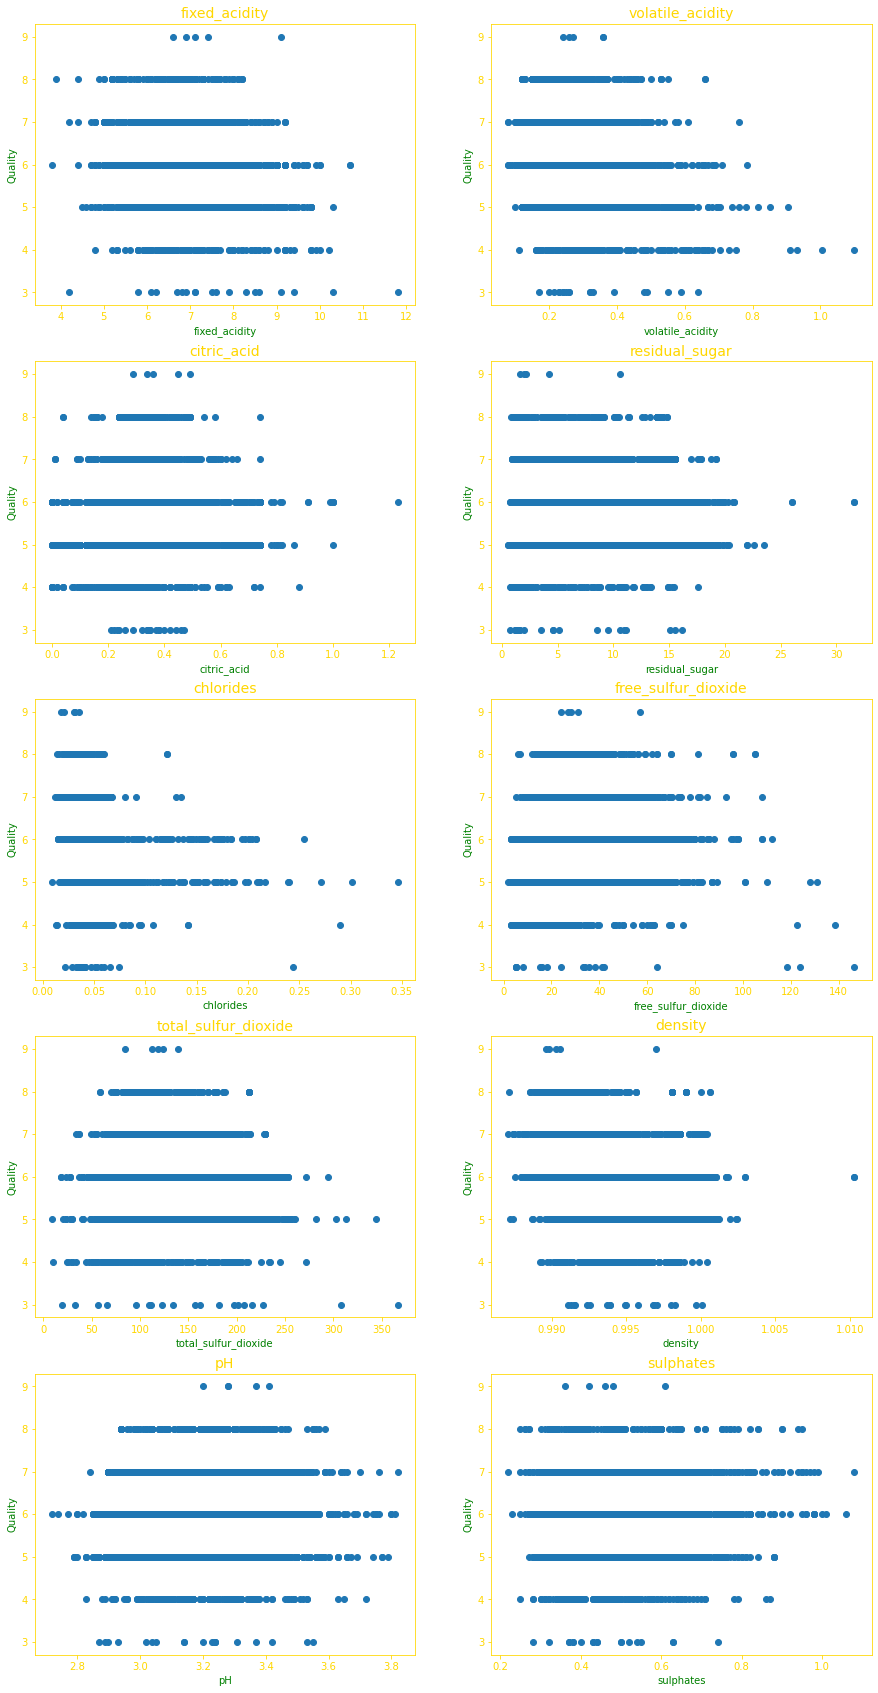

In [12]:
y=df_wine['quality']
x= ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides' ,'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

fig, axs = plt.subplots(5, 2, figsize=(15,30))
i=0
j=0
k=0
for i in range(5):
    for j in range(2):
        axs[i,j].scatter(df_wine[x[k]], y)
        axs[i,j].set_title(x[k],color='gold', size=14)
        axs[i,j].tick_params(color='gold', labelcolor='gold')
        axs[i,j].set_xlabel(x[k], color='green')
        axs[i,j].set_ylabel('Quality', color='green')
        for spine in axs[i,j].spines.values():
            spine.set_edgecolor('gold')
        k+=1
    


In [9]:
# Remove outliers from above plots
# df.drop(df[df.score < 50].index, inplace=True)
df_wine.drop(df_wine[df_wine.fixed_acidity > 12].index, inplace=True)
df_wine.drop(df_wine[df_wine.citric_acid > 1.5].index, inplace=True)
df_wine.drop(df_wine[df_wine.residual_sugar > 40].index, inplace=True)
df_wine.drop(df_wine[df_wine.free_sulfur_dioxide > 200].index, inplace=True)
df_wine.drop(df_wine[df_wine.density > 1.02].index, inplace=True)


In [10]:
# update database
database_update(red_data=df_red, white_data=df_white, all_data=df_wine)

Connection Properites: 

{'user': 'postgres', 'dbname': 'postgres', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 11.8, compiled by Visual C++ build 1914, 64-bit',) 

Database dropped
Database created
wine database opened successfully
red wine table created successfully
white wine table created successfully
all wine table created successfully
execute_many() done
execute_many() done
execute_many() done
